In [1]:
# Import the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise is a clustering algorithm which
# works better than KMeans and AgglomerativeHeirarchicalClustering in many cases.

# The reason for this is unlike the other two clustering methods this clustering method is based on density of the points.
# Here we put each point into three different classes:
'''
            Core : The given point has points greater than or equal to min_pts in its epsilon neighborhood .
            Boundary/Border : The given point has points less than min_pts but contains one core in its epsilon neighborhood .
            Noise : Points which are nor core and nor border points.
'''
# Note : The min_pts and epsilon are hyperparameters and we have control over them (this means if given incorrect values,
# clusters will form irregularly).

'\n            Core : The given point has points greater than or equal to min_pts in its epsilon neighborhood .\n            Boundary/Border : The given point has points less than min_pts but contains one core in its epsilon neighborhood .\n            Noise : Points which are nor core and nor border points.\n'

In [3]:
# We will make moons to start on which other clustering algorithms may fail to cluster irregular shaped groups.
from sklearn.datasets import make_moons # Import make_moons from datasets module 

In [4]:
# The make_moons function is similar to make_circles but creates the moons instead.
X,y = make_moons(
                    n_samples=1000, # The number or rows
                    noise = 0.095, # The noise to be added
                    shuffle = True # If true shuffles the values each time.
)

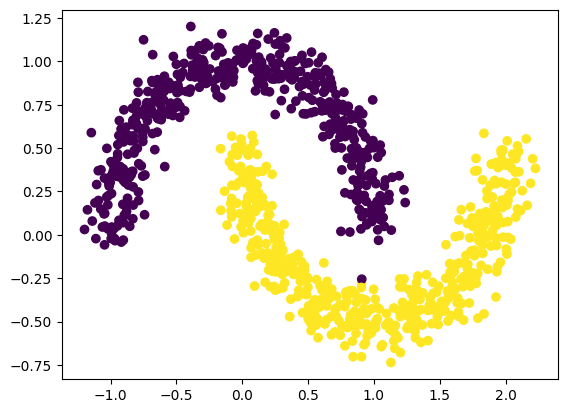

In [5]:
# Plotting the moons
plt.scatter(
                x = X[:,0], # The 1 variable
                y = X[:,1], # The 2 variable
                c = y # label
)
plt.show()

In [6]:
# Import the StandardScaler as DBSCAN is sensitive to distance we will Standardize it .
from sklearn.preprocessing import StandardScaler

In [7]:
X[:11] # The first 10 values

array([[ 0.17291679,  0.82969626],
       [-0.0400311 ,  1.06371886],
       [-0.75604002,  0.562376  ],
       [-0.29620223,  1.06793248],
       [-0.09218157,  0.92154253],
       [ 0.80195292, -0.53425654],
       [-0.85468654,  0.04941494],
       [ 1.76427694, -0.12059471],
       [-0.84338514,  0.34613293],
       [-0.94574445,  0.51984139],
       [ 0.10185624,  0.13592161]])

In [8]:
X = StandardScaler().fit_transform(X) # Instantiate and fit the scaler with X

In [9]:
X[:11] # The first 10 values after scalling

array([[-0.38259213,  1.14310487],
       [-0.62798193,  1.60717958],
       [-1.45307243,  0.61299974],
       [-0.92317987,  1.61553534],
       [-0.68807735,  1.32523911],
       [ 0.34227556, -1.56165964],
       [-1.56674742, -0.40421937],
       [ 1.45120645, -0.74135425],
       [-1.55372428,  0.18418244],
       [-1.6716777 ,  0.52865218],
       [-0.46447852, -0.23267372]])

In [10]:
# Import the DBSCAN class fromm the cluster module
from sklearn.cluster import DBSCAN

In [11]:
# Instantiate the DBSCAN model with parameters set appropriately.
dbs = DBSCAN(
                eps = 0.2, # Really highly hyper sensitive parameter.
                min_samples = 5, # The minimum no of samples to cluster in a epsilon neighborhood.
                metric = "euclidean" # The metric used to calculate the distance.
)

In [12]:
y_pred = dbs.fit_predict(X) # Predict the labels using variables.

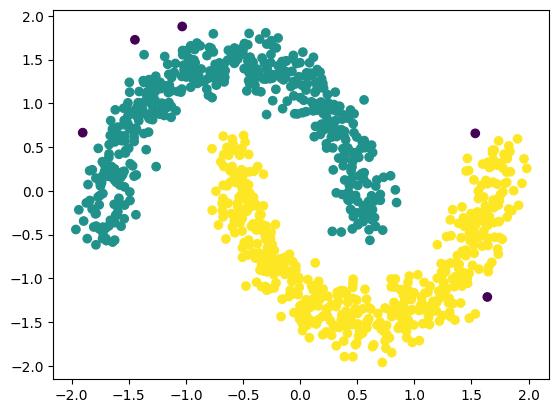

In [13]:
# Plot the predicted labels.
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y_pred
)
plt.show()

In [14]:
# Now we will use circles dataset to test DBSCAN
from sklearn.datasets import make_circles

In [15]:
# The proceedure is same as make_moons ; we have a new parameter called factor which is the distance between the two circles.
X,y = make_circles(
    n_samples = 500,
    noise = 0.05,
    factor = 0.55,
)


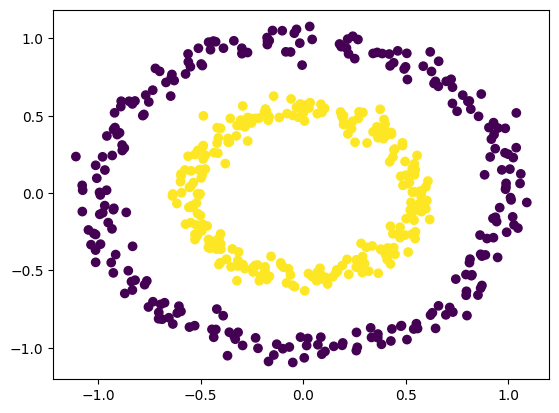

In [16]:
# Visualize the circle and adjust accordingly for Experimentation
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y
)
plt.show()

In [17]:
X[:11] # The first 10 values

array([[ 0.57712876, -0.11933994],
       [ 0.19398556,  0.48334624],
       [ 0.53285007,  0.16189408],
       [ 0.55224523, -0.8438133 ],
       [ 0.54521796, -0.11046718],
       [-0.55961647,  0.84801397],
       [ 0.50121715,  0.11621617],
       [-0.3306694 , -0.94393119],
       [ 0.57591987, -0.02473293],
       [-0.47668879,  0.15528623],
       [-0.54160331, -0.08028371]])

In [18]:
X = StandardScaler().fit_transform(X) # Scalling and fitting 

In [19]:
X[:11]  # The first 10 values after scalling

array([[ 1.00599365, -0.20458506],
       [ 0.33702339,  0.84945701],
       [ 0.92868279,  0.28726708],
       [ 0.96254687, -1.47162159],
       [ 0.9502772 , -0.18906743],
       [-0.97877017,  1.48722696],
       [ 0.87345153,  0.20738065],
       [-0.57902726, -1.64671847],
       [ 1.00388293, -0.0391262 ],
       [-0.83397796,  0.27571056],
       [-0.9473191 , -0.13627935]])

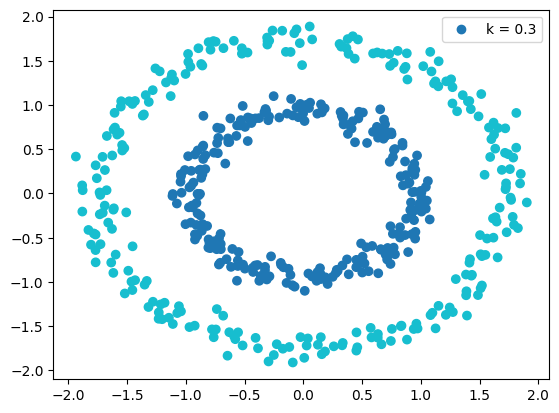

In [31]:
# Now unlike the moons I had to expereiment a lot before reaching the final eps value of 0.3.
# So we will be using different methods to find the perfect eps value.
dbs = DBSCAN(
    eps =  0.3, #0.2125
    min_samples = 5
)

y_pred = dbs.fit_predict(X)

plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    cmap = 'tab10',
    label = f'k = {dbs.eps}'
)
plt.legend()
plt.show()

In [ ]:
# Basically to find the perfect epsilon we can find the nearest neighbors for each point and sort their distanes accordingly.
# We will plot this minimum distances and look for the elbow point in it.
# The elbow point traced to y axis is the required epsilon value .

In [ ]:
from sklearn.neighbors import NearestNeighbors # Import the NearestNeighbors class from neighbors module 

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5) # Instantiate and fit the model with n_neighbors = min_pts in DBSCAN

In [ ]:
neighbors_fit = nbrs.fit(X) # Fit the X value

In [ ]:
distances,indices = nbrs.kneighbors(X) # Get the indices of the nearest neighbor values and the distances to them.

In [ ]:
min_distances = np.sort(distances[:,4],axis=0) # Sort the values

In [ ]:
min_distances[:10] # Examine

array([0.04978276, 0.05026673, 0.05053175, 0.05095644, 0.05171902,
       0.05221218, 0.05235284, 0.05365756, 0.05532213, 0.05697779])

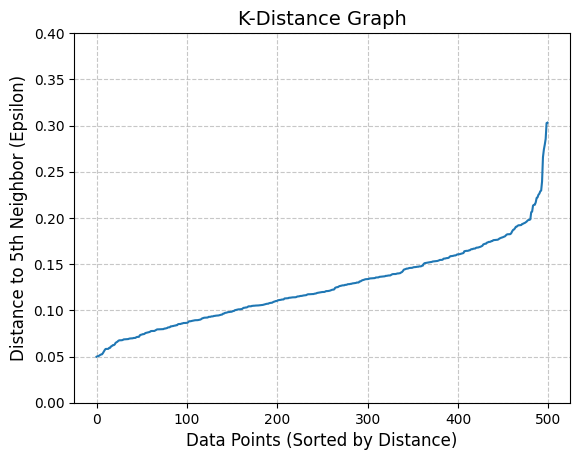

In [ ]:
# Plot the elbow diagram
plt.title("K-Distance Graph", fontsize=14)
plt.xlabel("Data Points (Sorted by Distance)", fontsize=12)
plt.ylabel(f"Distance to {5}th Neighbor (Epsilon)", fontsize=12)
plt.plot(min_distances)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0,0.4) # Limit according to the scope of minimum_distance
plt.show()

In [32]:
# # An alternative approach if the DBSCAN fails to find epsilon value

# # OPTICS Algorithm

# from sklearn.cluster import OPTICS

# clust = OPTICS(min_samples=5,metric='euclidean')
# clust.fit(X)

# # 2. Extract reachability distances and processing order
# reachability = clust.reachability_[clust.ordering_]
# labels = clust.labels_[clust.ordering_]

# # 3. Plot the Reachability Plot
# plt.figure(figsize=(10, 7))
# plt.bar(range(len(reachability)), reachability, color='gray', alpha=0.5)
# plt.title("OPTICS Reachability Plot (Valleys = Clusters)")
# plt.ylabel("Reachability Distance")
# plt.xlabel("Points in Processing Order")
# plt.show()